In [2]:
import pandas as pd
import requests as re

In [3]:
circuits = pd.read_csv('F1Data/circuits.csv')
races = pd.read_csv('F1Data/races.csv')

In [4]:
races = races[['circuitId', 'date', 'time']]
merged = races.merge(circuits, on='circuitId', how='inner')

In [74]:
def get_weather(row):
    lat = row['lat']
    lng = row['lng']
    start = row['date'].strftime('%Y-%m-%d')
    end = row['date'].strftime('%Y-%m-%d')
    url = f'https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lng}&start_date={start}&end_date={end}&hourly=temperature_2m,rain'
    data = re.get(url)
    return data.json()

In [75]:
merged['date'] = pd.to_datetime(merged['date'])
merged

,circuitId,date,time,circuitRef,name,location,country,lat,lng,alt,url,time_imp
0,1,2009-03-29,06:00:00,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,04:00:00
1,2,2009-04-05,09:00:00,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...,NaN
2,17,2009-04-19,07:00:00,shanghai,Shanghai International Circuit,Shanghai,China,31.33890,121.22000,5,http://en.wikipedia.org/wiki/Shanghai_Internat...,NaN
3,3,2009-04-26,12:00:00,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...,NaN
4,4,2009-05-10,12:00:00,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,32,2024-10-27,20:00:00,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico,19.40420,-99.09070,2227,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_He...,NaN
1121,18,2024-11-03,17:00:00,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.70360,-46.69970,785,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jo...,17:00:00
1122,80,2024-11-23,06:00:00,vegas,Las Vegas Strip Street Circuit,Las Vegas,United States,36.11470,-115.17300,642,https://en.wikipedia.org/wiki/Las_Vegas_Grand_...,NaN
1123,78,2024-12-01,17:00:00,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12,http://en.wikipedia.org/wiki/Losail_Internatio...,NaN


In [76]:
times = {
    "Argentina": "17:00:00",
    "Australia": "04:00:00",
    "Austria": "13:00:00",
    "Belgium": "13:00:00",
    "Brazil": "17:00:00",
    "Canada": "19:00:00",
    "France": "13:00:00",
    "Germany": "13:00:00",
    "Italy": "13:00:00",
    "Japan": "05:00:00",
    "Morocco": "14:00:00",
    "Portugal": "14:00:00",
    "South Africa": "12:00:00",
    "Spain": "13:00:00",
    "Sweden": "13:00:00",
    "Switzerland": "13:00:00",
    "UK": "14:00:00",
    "USA": "20:00:00"
}


In [77]:
merged[merged['time']=='\\N'].groupby('name').size()
merged['time_imp'] = merged['country'].map(times)
merged.loc[merged['time'] == '\\N', 'time'] = merged['time_imp']

In [96]:
merged = merged[merged['date']<="2024-11-23"]

In [100]:
data = []
for i in range(merged.shape[0]):
    row = merged.iloc[i]
    result = get_weather(row)
    result = pd.DataFrame(result['hourly'])
    result['time'] = pd.to_datetime(result['time'])
    hour = pd.to_datetime(row['time']).hour
    result = result[result['time'].dt.hour == hour]
    result['circuitId'] = row['circuitId']
    result['date'] = result['time'].dt.strftime('%Y-%m-%d')
    data.append(result)

print(data)

2009-03-29 2009-03-29
2009-04-05 2009-04-05
2009-04-19 2009-04-19
2009-04-26 2009-04-26
2009-05-10 2009-05-10
2009-05-24 2009-05-24
2009-06-07 2009-06-07
2009-06-21 2009-06-21
2009-07-12 2009-07-12
2009-07-26 2009-07-26
2009-08-23 2009-08-23
2009-08-30 2009-08-30
2009-09-13 2009-09-13
2009-09-27 2009-09-27
2009-10-04 2009-10-04
2009-10-18 2009-10-18
2009-11-01 2009-11-01
2008-03-16 2008-03-16
2008-03-23 2008-03-23
2008-04-06 2008-04-06
2008-04-27 2008-04-27
2008-05-11 2008-05-11
2008-05-25 2008-05-25
2008-06-08 2008-06-08
2008-06-22 2008-06-22
2008-07-06 2008-07-06
2008-07-20 2008-07-20
2008-08-03 2008-08-03
2008-08-24 2008-08-24
2008-09-07 2008-09-07
2008-09-14 2008-09-14
2008-09-28 2008-09-28
2008-10-12 2008-10-12
2008-10-19 2008-10-19
2008-11-02 2008-11-02
2007-03-18 2007-03-18
2007-04-08 2007-04-08
2007-04-15 2007-04-15
2007-05-13 2007-05-13
2007-05-27 2007-05-27
2007-06-10 2007-06-10
2007-06-17 2007-06-17
2007-07-01 2007-07-01
2007-07-08 2007-07-08
2007-07-22 2007-07-22
2007-08-05

In [113]:
weather_df = pd.concat(data,ignore_index=True)
weather_df.to_csv('weather.csv', index=False)

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
weather_df

,time,temperature_2m,rain,circuitId,date
0,2009-03-29 06:00:00,23.0,0.0,1,2009-03-29
1,2009-04-05 09:00:00,26.4,2.9,2,2009-04-05
2,2009-04-19 07:00:00,19.2,0.9,17,2009-04-19
3,2009-04-26 12:00:00,30.1,0.0,3,2009-04-26
4,2009-05-10 12:00:00,21.3,0.0,4,2009-05-10
...,...,...,...,...,...
995,2024-09-22 12:00:00,29.2,0.0,15,2024-09-22
996,2024-10-20 19:00:00,28.6,0.0,69,2024-10-20
997,2024-10-27 20:00:00,20.1,0.1,32,2024-10-27
998,2024-11-03 17:00:00,20.6,2.5,18,2024-11-03


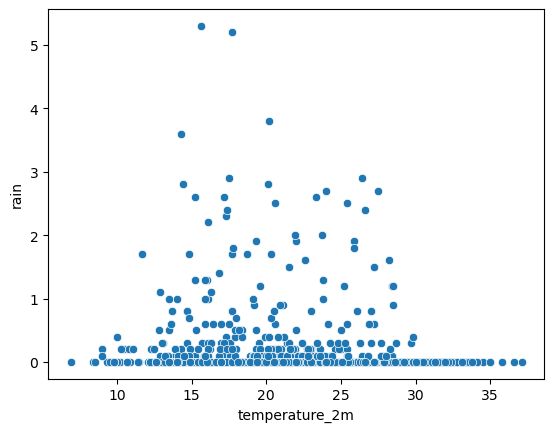

In [122]:
sns.scatterplot(weather_df, y='rain', x='temperature_2m')
plt.show()

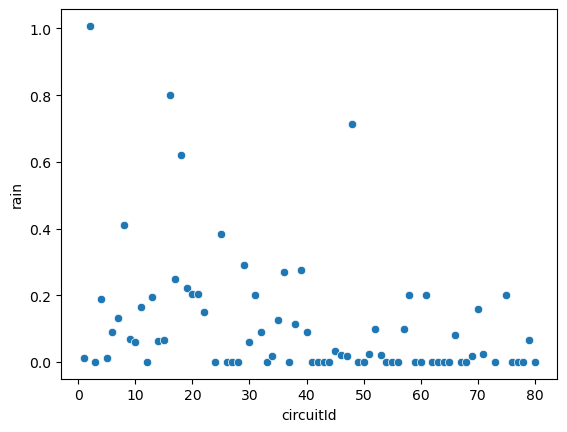

In [144]:
weather_heatmap = weather_df.groupby('circuitId')[['rain', 'temperature_2m']].mean().reset_index()

sns.scatterplot(weather_heatmap, y='rain', x='circuitId')
plt.show()